# Enhanced Online Learning Algorithm for FMNN

This example shows how to use the Simpson's Fuzzy Min-Max Neural Network trained by an enhanced online learning algorithm (EFMNN)

Note that the numerical features in training and testing datasets must be in the range of [0, 1] because the EFMNN classifiers require features in the unit cube.

## 1. Execute directly from the python file

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

#### Get the path to the this jupyter notebook file

In [3]:
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\numerical_data\\incremental_learner'

#### Get the home folder of the Hyperbox-Brain project

In [4]:
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

#### Create the path to the Python file containing the implementation of the FMNN using the enhanced online learning algorithm

In [5]:
efmnn_file_path = os.path.join(project_dir, Path("hbbrain/numerical_data/incremental_learner/efmnn.py"))
efmnn_file_path

'C:\\hyperbox-brain\\hbbrain\\numerical_data\\incremental_learner\\efmnn.py'

#### Run the found file by showing the execution directions

In [6]:
!python "{efmnn_file_path}" -h

usage: efmnn.py [-h] -training_file TRAINING_FILE -testing_file TESTING_FILE
                [--theta THETA] [--gamma GAMMA] [--is_draw IS_DRAW]

The description of parameters

required arguments:
  -training_file TRAINING_FILE
                        A required argument for the path to training data file
                        (including file name)
  -testing_file TESTING_FILE
                        A required argument for the path to testing data file
                        (including file name)

optional arguments:
  --theta THETA         Maximum hyperbox size (in the range of (0, 1])
                        (default: 0.5)
  --gamma GAMMA         A sensitivity parameter describing the speed of
                        decreasing of the membership function in each
                        dimension (larger than 0) (default: 1)
  --is_draw IS_DRAW     Show the existing hyperboxes during the training
                        process on the screen (default: False)


#### Create the path to training and testing datasets stored in the dataset folder

In [7]:
training_data_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
training_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_train.csv'

In [8]:
testing_data_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))
testing_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_test.csv'

#### Run a demo program

In [9]:
!python "{efmnn_file_path}" -training_file "{training_data_file}" -testing_file "{testing_data_file}" --theta 0.1 --gamma 1

Number of hyperboxes = 77
Testing accuracy =  85.80%


## 2. Using the EFMNN through its init, fit, and predict functions

In [10]:
from hbbrain.numerical_data.incremental_learner.efmnn import EFMNNClassifier
import pandas as pd

#### Create training and testing data sets

In [11]:
df_train = pd.read_csv(training_data_file, header=None)
df_test = pd.read_csv(testing_data_file, header=None)

Xy_train = df_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr = Xy_train[:, :-1]
ytr = Xy_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

#### Initializing parameters

In [12]:
theta = 0.1
gamma = 1
is_draw = True

### Training

<IPython.core.display.Javascript object>


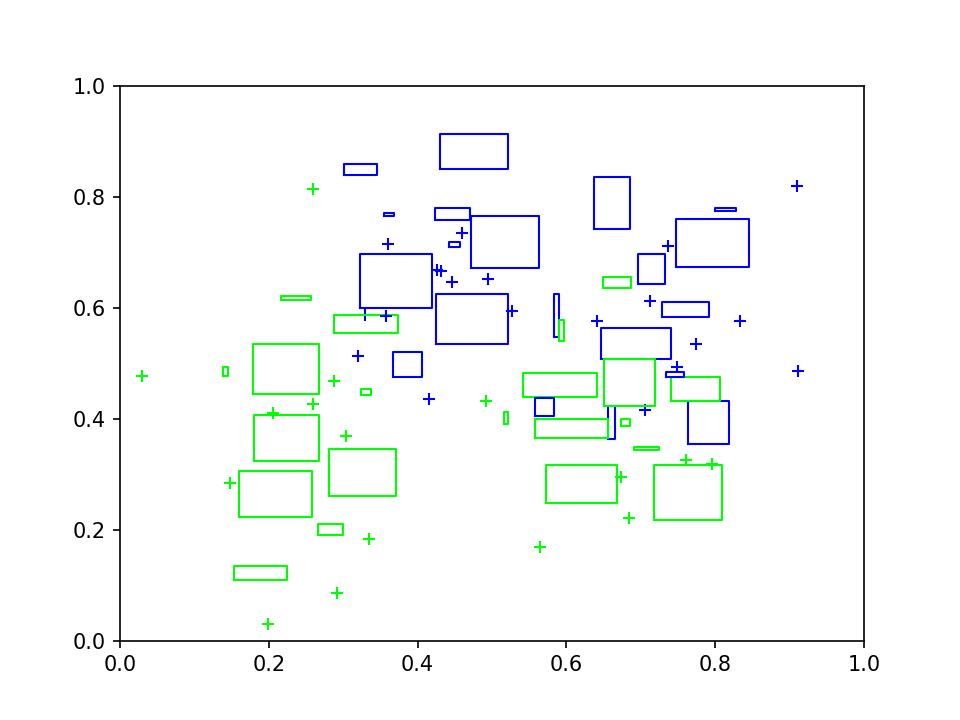

EFMNNClassifier(C=array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2]),
                V=array([[0.42413   , 0.53516   ],
       [0.74088   , 0.43310562],
       [0.91059   , 0.82085   ],
       [0.64586   , 0.50818437],
       [0.4713    , 0.672     ],
       [0.33484   , 0.18424   ],
       [0.32289   , 0.59994   ],
       [0.19944   , 0.03      ],
       [0.28077   , 0.26124...
       [0.36842   , 0.77238   ],
       [0.36057   , 0.71561   ],
       [0.6733    , 0.29485   ],
       [0.25621   , 0.62174   ],
       [0.14737   , 0.28498   ],
       [0.72496   , 0.34978   ],
       [0.73681   , 0.71261   ],
       [0.76138   , 0.32629   ],
       [0.52124   , 0.41288   ],
       [0.42647   , 0.66846   ],
       [0.91185   , 0.48697   ],
       [0.29163   , 0.086547  ],
       [0.35

In [13]:
efmnn_clf = EFMNNClassifier(theta=theta, gamma=gamma, is_draw=is_draw)
efmnn_clf.fit(Xtr, ytr)

#### The code below shows how to display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


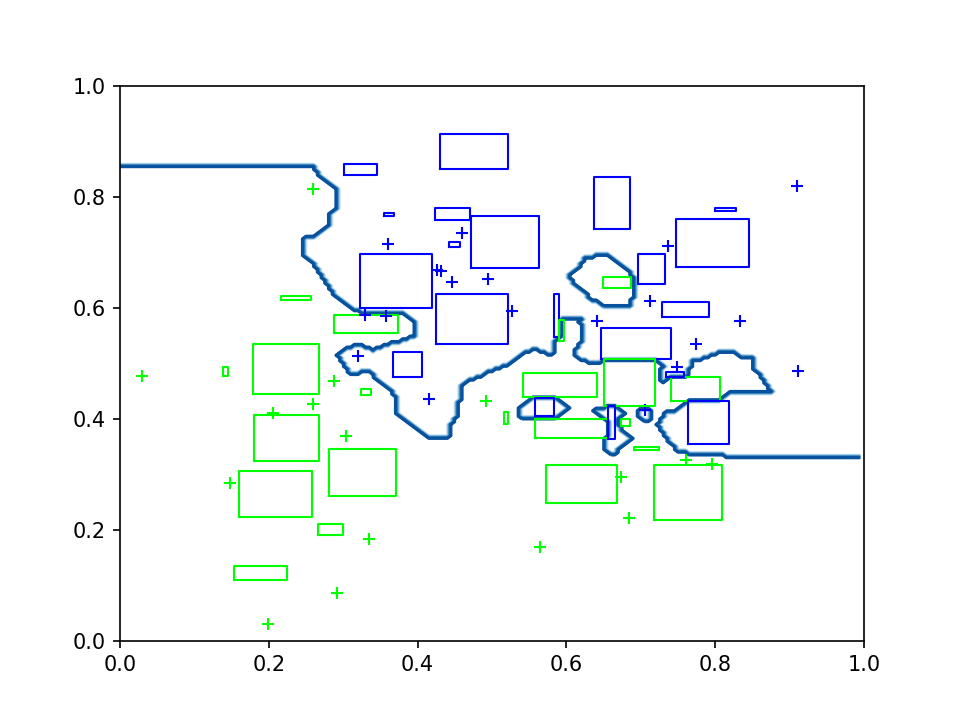

In [14]:
efmnn_clf.draw_hyperbox_and_boundary("The trained FMNNN and its decision boundaries")

In [15]:
print("Number of existing hyperboxes = %d"%(efmnn_clf.get_n_hyperboxes()))

Number of existing hyperboxes = 77


### Prediction

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_pred = efmnn_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  85.80%


#### Explaining the predicted result for the input sample by showing membership values and hyperboxes for each class

In [18]:
sample_need_explain = 10
y_pred_input_0, mem_val_classes, min_points_classes, max_points_classes = efmnn_clf.get_sample_explanation(Xtest[sample_need_explain])

In [19]:
print("Predicted class for sample X = [%f, %f] is %d and real class is %d" % (Xtest[sample_need_explain, 0], Xtest[sample_need_explain, 1], y_pred_input_0, ytest[sample_need_explain]))

Predicted class for sample X = [0.571640, 0.233700] is 2 and real class is 2


In [20]:
print("Membership values:")
for key, val in mem_val_classes.items():
    print("Class %d has the maximum membership value = %f" % (key, val))
    
for key in min_points_classes:
    print("Class %d has the representative hyperbox: V = %s and W = %s" % (key, min_points_classes[key], max_points_classes[key]))

Membership values:
Class 1 has the maximum membership value = 0.957157
Class 2 has the maximum membership value = 0.995862
Class 1 has the representative hyperbox: V = [0.55763 0.40507] and W = [0.58339 0.43813]
Class 2 has the representative hyperbox: V = [0.57285 0.24904] and W = [0.66773 0.31638]


### Show input sample and hyperboxes belonging to each class. In 2D, we can show rectangles or use parallel coordinates

#### Using rectangles to show explanations

<IPython.core.display.Javascript object>


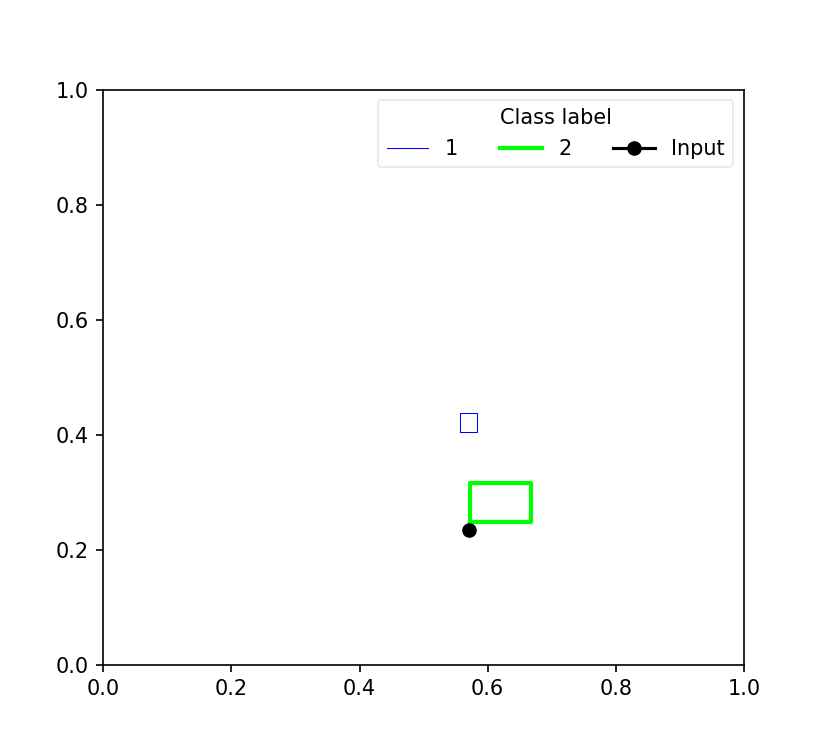

In [21]:
efmnn_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, "2D")

#### Using parallel coordinates. This mode best fits for any dimensions

In [ ]:
efmnn_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0)